# Modelagem e Simulação - parte 1

```
(*) Adaptado de material preparado pela Profa. Cristiane Sato
```

A computação tem se mostrado útil para apoiar o estudo e entendimento de problemas simples e complexos.

Por meio da simulação em ambientes computacionais podemos experimentar e analisar resultados para melhor compreender teorias, etc.

Vejamos um exemplo aparentemente simples no contexto dos jogos de azar.

## Jogo - duas possibilidades

Considere um jogo de azar com o seguinte formato: 
- O jogador escolhe o valor da aposta e escolhe um número (1 ou 2) - analogia com **"cara ou coroa"**.
- Em seguida, é sorteado um número (1 ou 2).
- Se o jogador acertar ele tem como lucro o valor de sua aposta.
- Caso contrário, ele perde o valor apostado.

Considere um jogador que utiliza a seguinte estratégia:
- Ele sempre aposta no número 1.
- O valor da aposta é sempre 20 reais.
- Ele tem 100 reais disponíveis inicialmente.
- Ele irá parar quando obtiver 100 reais de lucro (ou seja, ficar com o valor acumulado de 200 reais) ou quando o dinheiro dele acabar.

> Será uma boa estratégia?

O que fizemos acima foi "**modelar o problema**" ou seja, criar um "**modelo**" para representar o problema. 


### **Modelo**

Um **modelo** é uma representação (parcial) do objeto de interesse. 

No nosso exemplo, um possível modelo seria considerar que, em cada rodada, 
* Com probabilidade $p$, o número 1 é escolhido. Caso contrário, o número 2 é escolhido.
* Cada rodada é feita independentemente das demais.

Note que, ao escolher este modelo, estamos considerando que:
* o jogo é honesto, ou seja, não há interferência para fazer o jogador perder;
* cada rodada é independente das anteriores (forma como o sorteio é realizado)

> Será que o modelo é bom e suficiente?


### **Simulação Computacional**

Com a modelagem do problema (contexto do jogo de duas possibilidades - 1 ou 2) podemos fazer simulações, com o uso de ferramentas computacionais, o que chamamos de **simulação computacional**.

Neste problema vamos fazer uso de geração de números aleatórios, ou seja, um  **sistema** (função) irá gerar um número 1 ou 2, para simularmos os ganhos e perdas de um jogador hipotético.



In [ ]:
# importanto a biblioteca random (aleatório)
import random as rd

A célula abaixo gera um número aleatório dentre as duas opções: 1 ou 2. O resultado é armazenado na variável **sorteio**.

In [7]:
import random as rd
sorteio = rd.randint(1,2)
print(sorteio)

2


A função ``randint(a,b)`` escolhe um número entre $a$ e $b$ (com $a$ e $b$ inclusos). Cada número tem a mesma chance de ser sorteado.

Então estamos considerando $p=1/2$. Ou seja,
o número 1 é escolhido com probabilidade 1/2 (ou seja, 50%) e 2 é escolhido com probabilidade 1/2.

### Simulando N jogadas

Considerando a estratégia de que o jogador jogará apostará sempre no "1" (para tentar ganhar) podemos simular o que ocorre em 10 sorteios e contar quantas vezes "ganhou ou perdeu". Vejamos o código a seguir.

In [16]:
contg = 0  # conta quando ganhou
contp = 0  # conta quando perdeu
quant = 10  # quantidade de sorteios
for i in range(0, quant):
  sorteio = rd.randint(1,2)    # sorteia um número entre 1 e 2  
  if sorteio == 1:    ## escolha do jogador
    print("Sorteio :", sorteio, ": Ganhou")
    contg=contg+1
  else:    
    print("Sorteio :", sorteio, ": Perdeu")
    contp=contp+1   
pganhou = contg*100/quant  # percentual ganhou
pperdeu = contp*100/quant  # percentual perdeu
print("Quantidade ganhou: ", contg, "%.2f" % pganhou, "%")
print("Quantidade perdeu: ", contp, "%.2f" % pperdeu, "%")

Sorteio : 1 : Ganhou
Sorteio : 1 : Ganhou
Sorteio : 2 : Perdeu
Sorteio : 1 : Ganhou
Sorteio : 2 : Perdeu
Sorteio : 2 : Perdeu
Sorteio : 1 : Ganhou
Sorteio : 1 : Ganhou
Sorteio : 1 : Ganhou
Sorteio : 1 : Ganhou
Quantidade ganhou:  7 70.00 %
Quantidade perdeu:  3 30.00 %


Tente executar o programa acima mais de uma vez e veja que os resultados variam (quantidade de ganhou e perdeu).

### Simulando até alcançar um "objetivo"

Podemos aprimorar nosso simulador de modo que o jogador abandone o jogo quando ficar sem dinheiro ou quando conseguir dobrar seu saldo inicial. Vejamos o modelo e o simulador.

Vamos inicializar o saldo do jogador como $100$ e o valor da aposta como $20$:

In [17]:
saldo = 100
aposta = 20

In [23]:
saldo = 100
dobro = saldo * 2  # dobro do saldo inicial
aposta = 20
i = 0       # conta os sorteios
while (saldo > 0) and (saldo < dobro):  # executa enquanto saldo> 0 e saldo < dobro
  i=i+1
  sorteio = rd.randint(1,2)    # sorteia um número entre 1 e 2  
  if sorteio == 1:    
    saldo = saldo+aposta       # soma a aposta quando ganha
    print("Ganhou na rodada:", i, "Saldo = ", saldo)
  else:        
    saldo = saldo-aposta       # diminui a aposta quando perde
    print("Perdeu na rodada:", i, "Saldo = ", saldo)
  
print("Rodadas jogadas: ", i, "Saldo Final: ", saldo)


Perdeu na rodada: 1 Saldo =  80
Ganhou na rodada: 2 Saldo =  100
Perdeu na rodada: 3 Saldo =  80
Ganhou na rodada: 4 Saldo =  100
Ganhou na rodada: 5 Saldo =  120
Ganhou na rodada: 6 Saldo =  140
Perdeu na rodada: 7 Saldo =  120
Ganhou na rodada: 8 Saldo =  140
Ganhou na rodada: 9 Saldo =  160
Ganhou na rodada: 10 Saldo =  180
Perdeu na rodada: 11 Saldo =  160
Perdeu na rodada: 12 Saldo =  140
Perdeu na rodada: 13 Saldo =  120
Perdeu na rodada: 14 Saldo =  100
Perdeu na rodada: 15 Saldo =  80
Ganhou na rodada: 16 Saldo =  100
Ganhou na rodada: 17 Saldo =  120
Perdeu na rodada: 18 Saldo =  100
Ganhou na rodada: 19 Saldo =  120
Ganhou na rodada: 20 Saldo =  140
Ganhou na rodada: 21 Saldo =  160
Perdeu na rodada: 22 Saldo =  140
Ganhou na rodada: 23 Saldo =  160
Perdeu na rodada: 24 Saldo =  140
Ganhou na rodada: 25 Saldo =  160
Ganhou na rodada: 26 Saldo =  180
Perdeu na rodada: 27 Saldo =  160
Ganhou na rodada: 28 Saldo =  180
Perdeu na rodada: 29 Saldo =  160
Ganhou na rodada: 30 Saldo

Tente executar o programa acima mais de uma vez e veja que os resultados variam.

### Gráfico

Podemos optar pela visualização da simulação (perdas e ganhos) por meio de um gráfico, ao invés de "texto".

Execute várias vezes a solução a seguir e veja como é possível ver a trajetória do jogador (ganhos e perdas).

Rodadas jogadas:  17 Saldo Final:  200


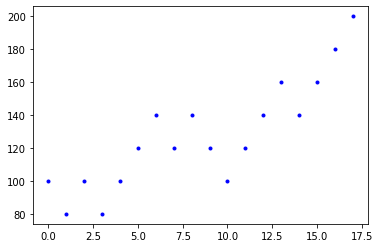

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
saldo = 100
dobro = saldo * 2  # dobro do saldo inicial
aposta = 20
i = 0       # conta os sorteios
plt.plot(i, saldo,'.b')
while (saldo > 0) and (saldo < dobro):  # executa enquanto saldo> 0 e saldo < dobro
  i=i+1
  sorteio = rd.randint(1,2)    # sorteia um número entre 1 e 2  
  if sorteio == 1:    
    saldo = saldo+aposta       # soma a aposta quando ganha
    #print("Ganhou na rodada:", i, "Saldo = ", saldo)
  else:        
    saldo = saldo-aposta       # diminui a aposta quando perde
    #print("Perdeu na rodada:", i, "Saldo = ", saldo)
  plt.plot(i, saldo,'.b')
print("Rodadas jogadas: ", i, "Saldo Final: ", saldo)

### Simulação com 3 possibilidades

Vejamos o comportamento da simulação quando ampliamos as possibilidades de resultados para 3 valores ao invés de 2.

Basta indicarmos na função `randint` os valores  `(1,3)`

In [32]:
saldo = 100
dobro = saldo * 2  # dobro do saldo inicial
aposta = 20
i = 0       # conta os sorteios
while (saldo > 0) and (saldo < dobro):  # executa enquanto saldo> 0 e saldo < dobro
  i=i+1
  sorteio = rd.randint(1,3)    # sorteia um número entre 1 e 3
  if sorteio == 1:    
    saldo = saldo+aposta       # soma a aposta quando ganha
    print("Ganhou na rodada:", i, "Saldo = ", saldo)
  else:        
    saldo = saldo-aposta       # diminui a aposta quando perde
    print("Perdeu na rodada:", i, "Saldo = ", saldo)
  
print("Rodadas jogadas: ", i, "Saldo Final: ", saldo)

Perdeu na rodada: 1 Saldo =  80
Perdeu na rodada: 2 Saldo =  60
Ganhou na rodada: 3 Saldo =  80
Perdeu na rodada: 4 Saldo =  60
Perdeu na rodada: 5 Saldo =  40
Ganhou na rodada: 6 Saldo =  60
Ganhou na rodada: 7 Saldo =  80
Ganhou na rodada: 8 Saldo =  100
Perdeu na rodada: 9 Saldo =  80
Perdeu na rodada: 10 Saldo =  60
Perdeu na rodada: 11 Saldo =  40
Ganhou na rodada: 12 Saldo =  60
Ganhou na rodada: 13 Saldo =  80
Ganhou na rodada: 14 Saldo =  100
Perdeu na rodada: 15 Saldo =  80
Perdeu na rodada: 16 Saldo =  60
Ganhou na rodada: 17 Saldo =  80
Ganhou na rodada: 18 Saldo =  100
Perdeu na rodada: 19 Saldo =  80
Perdeu na rodada: 20 Saldo =  60
Perdeu na rodada: 21 Saldo =  40
Perdeu na rodada: 22 Saldo =  20
Ganhou na rodada: 23 Saldo =  40
Perdeu na rodada: 24 Saldo =  20
Perdeu na rodada: 25 Saldo =  0
Rodadas jogadas:  25 Saldo Final:  0


Execute a solução acima várias vezes e note que agora a finalização ocorre mais por "perdas" do que por "ganhos". Isto porque, o jogador continua apostando no mesmo valor (1) e as a probabilidade agora é de aproximadamente 33% de sucesso (contra 50% anterioremente). Isto deve piorar ainda mais se o número de opções for ampliado. Imagine o caso de 1 `dado` (6 lados).


### Simulando Milhares de vezes

O programa abaixo simula "a falência" ou a "prosperidade" do jogador, indo 1000 vezes ao "cassino", num jogo de 2 possibilidades.

In [33]:
faliu = 0
prosperou = 0

for i in range(0,1000):
  saldo = 100
  aposta = 20
  dobro  = saldo * 2
  while saldo > 0 and saldo < dobro:
    sorteio = rd.randint(1,2)
    if sorteio == 1:
      saldo = saldo+aposta
    else:
      saldo = saldo-aposta
  if saldo<=0:
    faliu = faliu+1
  else:
    prosperou = prosperou+1

print("O jogador faliu",faliu,"vezes")
print("O jogador prosperou",prosperou,"vezes")

O jogador faliu 521 vezes
O jogador prosperou 479 vezes


> O que acontece? Em 1000 vezes o jogodor mais faliu ou mais prosperou:
> E se você alterar as opções para (1,3) ?
> E se você alterar as opções para (1,4) ? ....

### Exercícios

Copie o código acima para o espaço abaixo e "brinque" ampliando as opções (1,3); (1,4); (1,6). Analise os resultados.

**[DICA]:** Para não ter que ficar mudando o programa user o "input" para ler o "n", ou seja, o usuário poderia digitar 2, 3, 4, 6. Use o "n" em randint().

In [ ]:
# faça suas simulações neste espaço

### Jogando com variações

O código abaixo permite que o jogador digite sua opção (num jogo de duas opções) ao invés de sempre apostar no mesmo número.

O programa inicialmente pergunta ao jogador quantas vezes quer jogar.

In [35]:
saldo = 100
aposta = 20
k = input("Quantas jogadas?")
k = int(k)
for i in range(0, k):  
  escolha = int(input("1 ou 2?"))  
  sorteio = rd.randint(1,2)    # sorteia um número entre 1 e 2
  if sorteio == escolha:    
    saldo = saldo+aposta       # soma a aposta quando ganha
    print("Ganhou na rodada:", i, "Saldo = ", saldo)
  else:        
    saldo = saldo-aposta       # diminui a aposta quando perde
    print("Perdeu na rodada:", i, "Saldo = ", saldo)
  
print("Rodadas jogadas: ", k, "Saldo Final: ", saldo)

Quantas jogadas?15
1 ou 2?1
Perdeu na rodada: 0 Saldo =  80
1 ou 2?2
Ganhou na rodada: 1 Saldo =  100
1 ou 2?1
Perdeu na rodada: 2 Saldo =  80
1 ou 2?2
Ganhou na rodada: 3 Saldo =  100
1 ou 2?1
Ganhou na rodada: 4 Saldo =  120
1 ou 2?1
Ganhou na rodada: 5 Saldo =  140
1 ou 2?1
Perdeu na rodada: 6 Saldo =  120
1 ou 2?2
Ganhou na rodada: 7 Saldo =  140
1 ou 2?2
Ganhou na rodada: 8 Saldo =  160
1 ou 2?1
Ganhou na rodada: 9 Saldo =  180
1 ou 2?2
Ganhou na rodada: 10 Saldo =  200
1 ou 2?1
Perdeu na rodada: 11 Saldo =  180
1 ou 2?1
Ganhou na rodada: 12 Saldo =  200
1 ou 2?2
Ganhou na rodada: 13 Saldo =  220
1 ou 2?1
Perdeu na rodada: 14 Saldo =  200
Rodadas jogadas:  15 Saldo Final:  200


## [Extra] - Sobre números aleatórios

É importante informar que, na verdade, o computador não consegue sortear números que são verdadeiramente aleatórios. Ele sorteia o que chamamos de números pseudo-aleatórios, que têm um comportamento que tenta ser similar ao aleatório.

Um dos fatores que vários métodos usam para sortear números pseudo-aleatórios é o horário do computador. 

O horário é usado em uma variável chamada de **seed**, que basicamente determina os valores que serão sorteados. 

O python possui outras funções para lidar com geração de números aleatórios e estão presentes na biblioteca random.

* rd.random()         - sorteia 1 número real entre 0 e 1 com a mesma chance.
* rd.choice([1,4,5])  - sorteia 1 dos três números 
* rd.choice(["cara", "coroa"]) - sorteia 1 das duas opções
* rd.choices(["cara","coroa"],weights=[.4,.6],k=1) - indica-se os pesos para cada opção (40% e 60%)
* rd.choices(["cara","coroa"],weights=[.4,.6],k=5) - executa 5 sorteios (k=5)


In [ ]:
# importanto a biblioteca random (aleatório)
import random as rd

### Exemplo 1 - números fixos

Execute a célula abaixo para ver que sempre fica igual (a seed foi definida como 0):



In [67]:
rd.seed(0)
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))

2
2
1
2
2


Mudando o valor do seed, para 1 por exemplo, muda o sorteio:

In [70]:
rd.seed(1)
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))
print(rd.randint(1,2))

1
1
2
1
2


### Exemplo 2 - Mesma chance

Para gerar um número real entre 0 e 1 onde cada número tem a mesma chance de ser sorteado, usamos a função random():

In [42]:
rd.random()

0.9081128851953352

### Exemplo 3 - Sorteando o número de 1 lista

Podemos fazer também um sorteio de um elemento de uma lista. Cada elemento da lista tem a mesma chance de ser sorteado. Note o uso de [ e ].

In [47]:
rd.choice([1,4,5])

1

### Exemplo 4 - Rótulos ao invés de números

Então, se você quiser simular um sorteio de cara ou coroa, você poderia fazer assim:

In [54]:
rd.choice(["cara", "coroa"])

'coroa'

### Exemplo 5 - Mudando a probabilidade

Todos os exemplos que vimos até agora atribuem a mesma chance para cada possibilidade.

E se quisermos fazer uma moeda onde a chance de sair cara é 0.4 (ou seja, 40%) e a de sair coroa é 0.6 (ou seja, 60%).

Podemos utilizar a função choices que recebe as chances de cada possibilidade.

In [ ]:
rd.choices(["cara","coroa"],weights=[.4,.6],k=1)

['coroa']

### Exemplo 6 - Vários sorteios de 1 vez

Essa função é foi feita com a possibilidade de realizar vários sorteios de uma vez, isso é controlado pela opção  k . Veja como fazer 5 sorteios de uma só vez:

In [56]:
rd.choices(["cara","coroa"],weights=[.4,.6],k=5)

['coroa', 'coroa', 'coroa', 'cara', 'coroa']

A função sempre retorna uma lista (por isso os [ e ]).

O resultado pode ser armazenado numa lista (conjunto), conforme exemplo abaixo. 

In [59]:
s = rd.choices(["cara","coroa"],weights=[.4,.6],k=5)
s

['coroa', 'cara', 'coroa', 'coroa', 'coroa']

In [62]:
s = rd.choices(["cara","coroa"],weights=[.4,.6],k=5)
len(s)

5

Podemos ainda "processar" cada valor sorteado, linha a linha usando um laço de repetição

In [64]:
i = 0
quant = len(s)   # obtem o tamanoh da lista
while (i < quant):
  print("i=", i, " sorteio:", s[i])
  i=i+1

i= 0  sorteio: cara
i= 1  sorteio: coroa
i= 2  sorteio: cara
i= 3  sorteio: coroa
i= 4  sorteio: coroa


Alternativamente com o for:

In [ ]:
for i in range(len(s)):
  print("i=", i, " sorteio:", s[i])

i= 0  sorteio: cara
i= 1  sorteio: cara
i= 2  sorteio: coroa
i= 3  sorteio: coroa
i= 4  sorteio: cara
